# **Revolution Consulting - Machine Learning Modelling**
### **Connect5G Networks: Spam detection**
#### Jana Omaiche

#### **Importing Libraries:**

In [2]:
import pandas as pd # data manipulation
import numpy as np # numerical computations
import matplotlib.pyplot as plt # data visualisations
import seaborn as sns # enhanced visualisations
import re # regular expressions
import ssl # secure socket layer connections
import nltk # natural language toolkit
import time # time
from nltk.corpus import stopwords # stopwords corpus
from nltk.tokenize import word_tokenize # tokenisation
from nltk.stem import WordNetLemmatizer # Lemmatisation
from sklearn.feature_extraction.text import CountVectorizer # converting text into matric of token counts
from sklearn.neighbors import KNeighborsClassifier # k-nearest neighbours
from sklearn.tree import DecisionTreeClassifier # decision trees
from sklearn.model_selection import train_test_split # splitting dataset into training and testing 
from sklearn.model_selection import GridSearchCV # hyperparameter tuning vis cross-validation
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay  # calculating accuracy tools & visualising matrix
from imblearn.over_sampling import SMOTE # syhnthetic minority over-sampling technique (handling imbalance)
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score

#### **Loading Dataset:**

In [3]:
# Loading dataset
sms_df = pd.read_csv('A3_sms.csv', usecols = lambda column: column not in ['Unnamed: 0', 'Unnamed: 3'] )

print(sms_df.head())

                                                 sms   spam
0  1. Tension face 2. Smiling face 3. Waste face ...  False
1  Hhahhaahahah rofl was leonardo in your room or...  False
2                        Oh for  sake she's in like   False
3  No da:)he is stupid da..always sending like th...  False
4  Lul im gettin some juicy gossip at the hospita...  False


#### **Cleaning Dataset:**

Checking data types:

In [4]:
# Data types in dataset
sms_df.dtypes

sms     object
spam      bool
dtype: object

Converting string to integer to prepare for data modelling:

In [5]:
# Converting data type (string to integer)
sms_df['spam'] = sms_df['spam'].astype(int)

Checking for missing data:

In [6]:
# Missing values
missing_data = sms_df.isnull().sum()
print(missing_data)

sms     0
spam    0
dtype: int64


Checking unique values in spam column:

In [7]:
# Unique values
print(sms_df['spam'].unique())

[0 1]


Converting text to lower-case:

In [8]:
# Converting sms texts to lowercase
sms_df['sms'] = sms_df['sms'].str.lower()
print(sms_df.head())

                                                 sms  spam
0  1. tension face 2. smiling face 3. waste face ...     0
1  hhahhaahahah rofl was leonardo in your room or...     0
2                        oh for  sake she's in like      0
3  no da:)he is stupid da..always sending like th...     0
4  lul im gettin some juicy gossip at the hospita...     0


#### **Exploratory Data Analysis:**

Checking data is balanced:

spam
0    4647
1     704
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

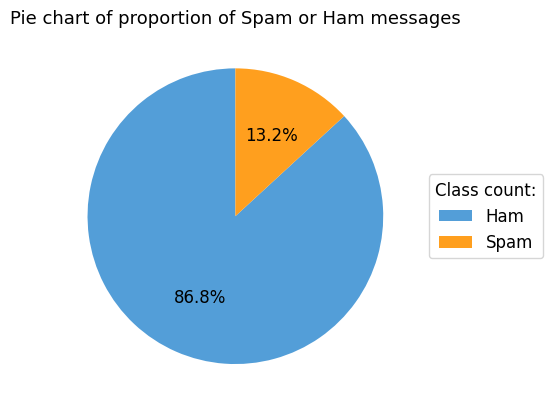

In [9]:
# Defining class counts
class_counts = sms_df['spam'].value_counts()
print(class_counts)

# Plotting pie chart for ham and spam proportions
pie_labels = ["Ham", "Spam"]
pie_colours = ["#539ED8", "#FF9F1E"]

plt.pie(class_counts, labels = None, autopct = '%1.1f%%', startangle = 90, textprops = {'fontsize': 12}, colors = pie_colours)
plt.legend(labels = pie_labels , bbox_to_anchor = (1, 0.5), fontsize = 12, loc = 'center left', title = "Class count:", title_fontsize = 12)
plt.title(f'Pie chart of proportion of Spam or Ham messages', fontsize = 13)
plt.grid(True, linewidth = 0.5)

plt.show

Extracting features using count vectorizer:

In [10]:
# Applying Count Vectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(sms_df['sms'])
print(x.shape)

(5351, 8280)


There are 5351 text messages, and 8280 unique words (tokens).

Removing stopwords:

In [11]:
# Importing stopwords
from nltk.corpus import stopwords as nltk_stopwords

stopwords_list = nltk_stopwords.words('english')
vectorizer = CountVectorizer(stop_words = stopwords_list)
stopwords_vectorized = vectorizer.fit_transform(sms_df['sms'])

print(stopwords_vectorized.shape)


(5351, 8145)


After removing stopwords, there are now 8145 unique words (tokens).

Identifying common spam and ham words in SMS messages:

In [12]:
# Defining spam and ham as numerical values
spam = sms_df[sms_df['spam'] == 1]['sms']
ham = sms_df[sms_df['spam'] == 0]['sms']

# Counting words
def count_words(messages):
    words = ' '.join(messages).split()
    return Counter(words)

spam_word_counts = count_words(spam)
ham_word_counts = count_words(ham)

# Printing most common word counts for spam and ham
print(spam_word_counts.most_common)
print(ham_word_counts.most_common)

<bound method Counter.most_common of Counter({'to': 636, 'a': 357, 'call': 329, 'your': 253, 'you': 239, 'the': 193, 'for': 190, 'or': 183, 'free': 172, '2': 155, 'is': 147, 'ur': 141, 'on': 138, 'have': 131, 'txt': 126, 'from': 120, 'mobile': 107, 'claim': 106, 'and': 104, 'u': 103, 'with': 98, 'reply': 94, 'text': 93, 'of': 87, '&': 86, 'now': 85, '4': 85, 'our': 84, 'this': 78, 'stop': 75, 'are': 74, 'get': 73, 'just': 68, 'now!': 66, 'won': 64, 'only': 64, 'nokia': 64, 'new': 63, 'send': 62, 'win': 58, 'prize': 58, 'cash': 56, 'in': 56, 'contact': 56, 'please': 52, '-': 51, 'be': 49, 'out': 47, 'we': 47, 'who': 43, 'service': 43, 'will': 42, 'been': 42, 'urgent!': 42, 'tone': 40, 'customer': 40, 'per': 39, 'awarded': 38, 'draw': 37, 'latest': 36, 'by': 33, 'receive': 33, 'â£1000': 33, 'box': 33, 'as': 32, 'po': 32, 'holiday': 31, 'has': 31, 'phone': 31, 'week': 31, 'shows': 31, '150ppm': 30, 'no': 29, 'guaranteed': 29, 'every': 29, 'chat': 28, 'number': 28, '1': 27, 'if': 27, 'that

Proportion of spam messages:

In [13]:
# Proportion of spam sms
proportion_spam = len(spam) / (len(spam) + len(ham)) * 100

print(proportion_spam)

13.156419360867128


There proportion of spam messages in the cleaned dataset is 13.16%.

#### **Data Modelling:**

Splitting into training and test sets:

In [14]:
# Splitting features (X) and variable (y)
X = sms_df['sms']
y = sms_df['spam']

# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (4280,)
Test set shape: (1071,)


Balancing the training dataset using SMOTE:

In [15]:
# Initialising CountVectorizer
vectorizer = CountVectorizer()

# Fiting & transforming the training and test data
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialising SMOTE
smote = SMOTE(random_state = 123)

# Applying SMOTE to balance the training dataset
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_vectorized, y_train)

**KNN:**

KNN without SMOTE:

In [16]:
# Defining KNN model
knn = KNeighborsClassifier()

# Training and evaluating KNN model without SMOTE
start_time = time.time()
knn.fit(X_train_vectorized, y_train)
knn_pred = knn.predict(X_test_vectorized)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_balanced_accuracy = balanced_accuracy_score(y_test, knn_pred)
training_time_knn = time.time() - start_time
prediction_time_knn = 0 


print("KNN Accuracy:", knn_accuracy)
print("KNN Balanced Accuracy:", knn_balanced_accuracy)
print("KNN Training Time:", training_time_knn)
print("KNN Prediction Time:", prediction_time_knn)

KNN Accuracy: 0.9290382819794585
KNN Balanced Accuracy: 0.696
KNN Training Time: 0.1485731601715088
KNN Prediction Time: 0


KNN with SMOTE:

In [17]:
# Defining KNN mdoel
knn = KNeighborsClassifier() 

# Defining hyperparameter grid
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']}

# Performing GridSearchCV
knn_grid = GridSearchCV(knn, knn_param_grid, scoring = 'accuracy', cv = 5)
knn_grid.fit(X_train_balanced, y_train_balanced)

# Obtaining best parameters
best_knn_params_smote = knn_grid.best_params_

# Fitting model with best parameter
knn_best_smote = KNeighborsClassifier(**best_knn_params_smote)
knn_best_smote.fit(X_train_balanced, y_train_balanced)

# Predicting using model
knn_pred_smote = knn_best_smote.predict(X_test_vectorized)

# Evaluating model
knn_accuracy_smote = accuracy_score(y_test, knn_pred_smote)

print("KNN Accuracy:", knn_accuracy_smote)
print("\nKNN Classification Report (SMOTE):")
print(classification_report(y_test, knn_pred_smote))

KNN Accuracy: 0.6442577030812325

KNN Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       1.00      0.60      0.75       946
           1       0.25      0.98      0.39       125

    accuracy                           0.64      1071
   macro avg       0.62      0.79      0.57      1071
weighted avg       0.91      0.64      0.71      1071



**Decision Tree:**

Decision tree without SMOTE:

In [18]:
# Defining decision tree model
dt = DecisionTreeClassifier()

# Training and evaluating decision tree model without SMOTE
start_time = time.time()
dt.fit(X_train_vectorized, y_train)
dt_pred = dt.predict(X_test_vectorized)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_balanced_accuracy = balanced_accuracy_score(y_test, dt_pred)
training_time_dt = time.time() - start_time
prediction_time_dt = 0  

print("\nDecision Tree Accuracy:", dt_accuracy)
print("Decision Tree Balanced Accuracy:", dt_balanced_accuracy)
print("Decision Tree Training Time:", training_time_dt)
print("Decision Tree Prediction Time:", prediction_time_dt)



Decision Tree Accuracy: 0.9710550887021475
Decision Tree Balanced Accuracy: 0.9315433403805498
Decision Tree Training Time: 0.14799976348876953
Decision Tree Prediction Time: 0


Decision tree with SMOTE:

In [19]:
# Defining decision tree model
dt = DecisionTreeClassifier()

# Defining hyperparameter grid
dt_param_grid = {
    'max_depth': [3, 5, 7, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]}

# Performing GridSearchCV
dt_grid = GridSearchCV(dt, dt_param_grid, scoring='accuracy', cv=5)
dt_grid.fit(X_train_balanced, y_train_balanced)

# Obtaining best parameters
best_dt_params_smote = dt_grid.best_params_

# Fitting model with best parameter
dt_best_smote = DecisionTreeClassifier(**best_dt_params_smote)
dt_best_smote.fit(X_train_balanced, y_train_balanced)

# Predicting using model
dt_pred_smote = dt_best_smote.predict(X_test_vectorized)

# Evaluating model
dt_accuracy_smote = accuracy_score(y_test, dt_pred_smote)

print("Decision Tree Accuracy:", dt_accuracy_smote)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_pred_smote))

Decision Tree Accuracy: 0.9365079365079365

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       946
           1       0.70      0.81      0.75       125

    accuracy                           0.94      1071
   macro avg       0.84      0.88      0.86      1071
weighted avg       0.94      0.94      0.94      1071



Calculating prediction times for both models with SMOTE:

In [20]:
# Measuring prediction time for KNN with SMOTE
start_time_knn_smote = time.time()
knn_pred_smote = knn_best_smote.predict(X_test_vectorized)
end_time_knn_smote = time.time()
prediction_time_knn_smote = end_time_knn_smote - start_time_knn_smote

# Measuring prediction time for decision tree with SMOTE
start_time_dt_smote = time.time()
dt_pred_smote = dt_best_smote.predict(X_test_vectorized)
end_time_dt_smote = time.time()
prediction_time_dt_smote = end_time_dt_smote - start_time_dt_smote

print("Prediction time for KNN with SMOTE:", prediction_time_knn_smote)
print("Prediction time for Decision Tree with SMOTE:", prediction_time_dt_smote)


Prediction time for KNN with SMOTE: 0.15155959129333496
Prediction time for Decision Tree with SMOTE: 0.0009989738464355469


Calculating accuracy and balanced accuracy for both models with SMOTE:

In [21]:
# Calculating accuracy
knn_accuracy_smote = accuracy_score(y_test, knn_pred_smote)
dt_accuracy_smote = accuracy_score(y_test, dt_pred_smote)

# Calculating balanced accuracy
knn_balanced_accuracy_smote = balanced_accuracy_score(y_test, knn_pred_smote)
dt_balanced_accuracy_smote = balanced_accuracy_score(y_test, dt_pred_smote)

# Creating a dictionary to hold the metrics
metrics_smote = {
    "Model": ["KNN", "Decision Tree"],
    "Accuracy": [knn_accuracy_smote, dt_accuracy_smote],
    "Balanced Accuracy": [knn_balanced_accuracy_smote, dt_balanced_accuracy_smote],
    "Prediction Time": [prediction_time_knn_smote, prediction_time_dt_smote]}

# Convert dictionary to a dataframe
metrics_df_with_smote = pd.DataFrame(metrics_smote)

# Print metrics with smote
print(metrics_df_with_smote)

           Model  Accuracy  Balanced Accuracy  Prediction Time
0            KNN  0.644258           0.791683         0.151560
1  Decision Tree  0.936508           0.880744         0.000999


Plotting models for comparison of accuracy, balanced accuracy, and prediction times:

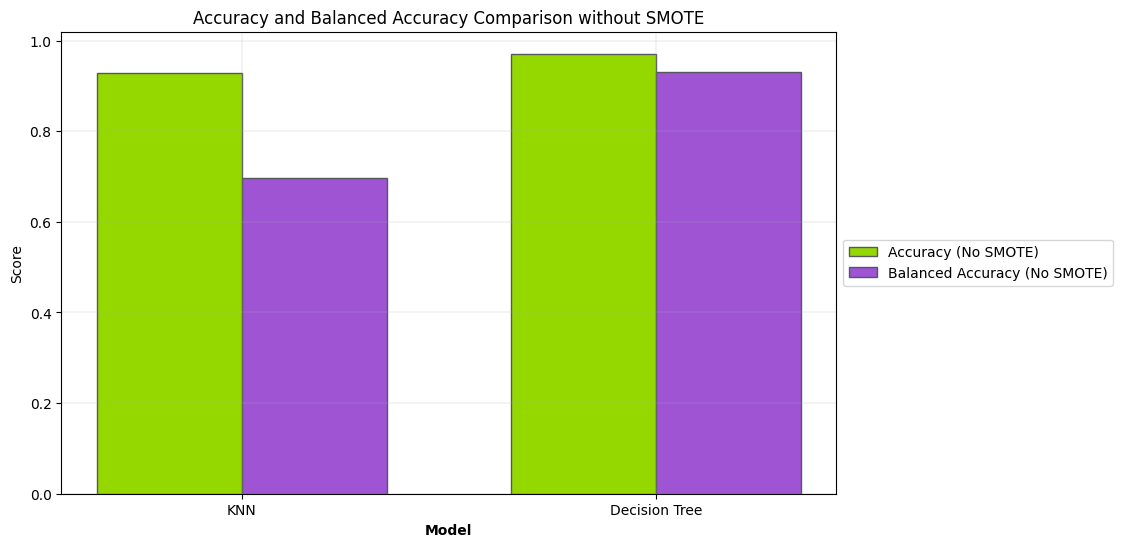

In [22]:
# Models and metrics without SMOTE
models = ["KNN", "Decision Tree"]
accuracy_no_smote = [knn_accuracy, dt_accuracy]
balanced_accuracy_no_smote = [knn_balanced_accuracy, dt_balanced_accuracy]

# Width of the bars
bar_width = 0.35

# X-coordinates for the bars
r1 = np.arange(len(models))

# Plotting accuracy comparison without SMOTE
plt.figure(figsize = (10, 6))
plt.bar(r1, accuracy_no_smote, color = '#95D800', width = bar_width, edgecolor = '#55595D', label = 'Accuracy (No SMOTE)')
plt.bar(r1 + bar_width, balanced_accuracy_no_smote, color = '#9E54D3', width = bar_width, edgecolor = '#55595D', label = 'Balanced Accuracy (No SMOTE)')

plt.grid(True, linewidth = 0.2)

plt.xlabel('Model', fontweight = 'bold')
plt.xticks(r1 + bar_width / 2, models)
plt.ylabel('Score')
plt.title('Accuracy and Balanced Accuracy Comparison without SMOTE')
plt.legend(title = "Metrics:")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.show()



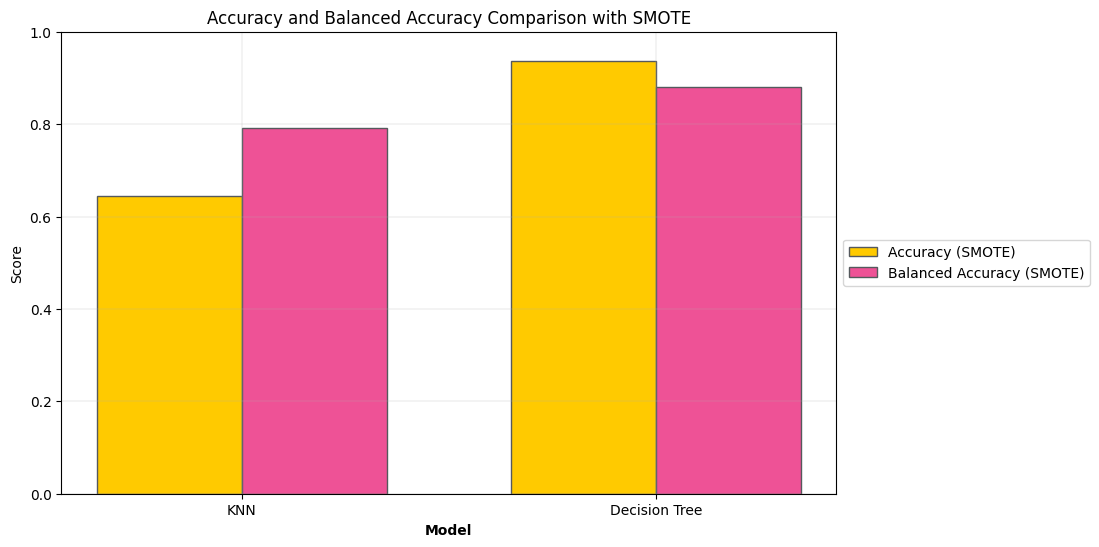

In [23]:
# Models and metrics with SMOTE
accuracy_with_smote = [knn_accuracy_smote, dt_accuracy_smote]
balanced_accuracy_with_smote = [knn_balanced_accuracy_smote, dt_balanced_accuracy_smote]

# Plotting accuracy comparison with SMOTE
plt.figure(figsize = (10, 6))
plt.bar(r1, accuracy_with_smote, color = '#FFCA00', width = bar_width, edgecolor = '#55595D', label = 'Accuracy (SMOTE)')
plt.bar(r1 + bar_width, balanced_accuracy_with_smote, color = '#EE5296', width = bar_width, edgecolor = '#55595D', label = 'Balanced Accuracy (SMOTE)')

plt.grid(True, linewidth = 0.2)

plt.xlabel('Model', fontweight = 'bold')
plt.xticks(r1 + bar_width / 2, models)
plt.ylabel('Score')
plt.title('Accuracy and Balanced Accuracy Comparison with SMOTE')
plt.legend(title = "Metrics:")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.ylim(0, 1.0)

plt.show()

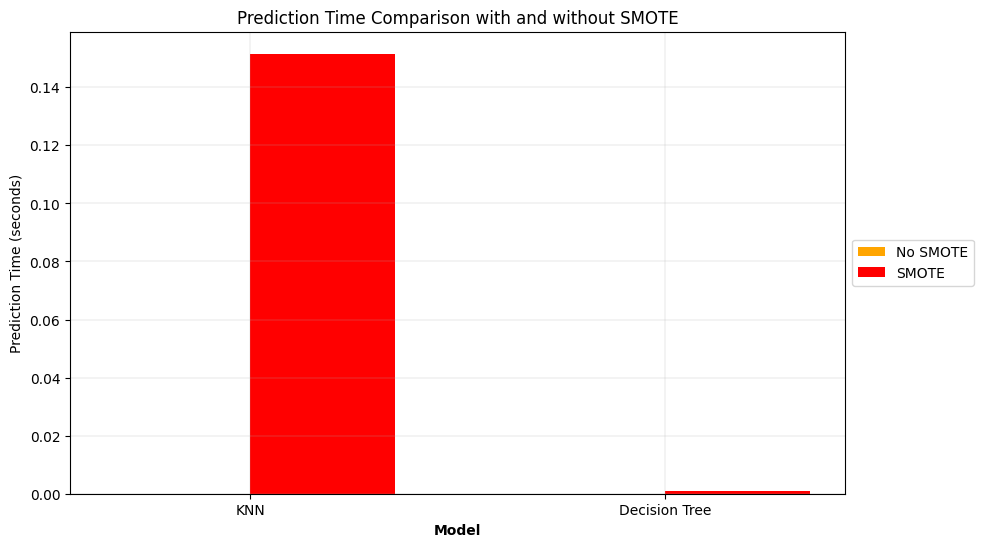

In [24]:
# Prediction times without SMOTE
prediction_time_no_smote = [prediction_time_knn, prediction_time_dt]

# Prediction times with SMOTE
prediction_time_with_smote = [prediction_time_knn_smote, prediction_time_dt_smote]

# Plotting prediction time comparison
plt.figure(figsize = (10, 6))
bar_width = 0.35
r1 = np.arange(len(models))
plt.grid(True, linewidth = 0.2)

plt.bar(r1, prediction_time_no_smote, color = 'orange', width = bar_width, label = 'No SMOTE')
plt.bar(r1 + bar_width, prediction_time_with_smote, color = 'red', width = bar_width, label = 'SMOTE')

plt.xlabel('Model', fontweight = 'bold')
plt.xticks(r1 + bar_width / 2, models)
plt.ylabel('Prediction Time (seconds)')
plt.title('Prediction Time Comparison with and without SMOTE')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.show()